In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1060 6GB (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5005)


In [3]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()

In [4]:
x_train = x0_train.reshape(60000, 28*28)
x_test = x0_test.reshape(10000, 28*28)

In [5]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y0_train,10)
y_test = np_utils.to_categorical(y0_test,10)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=500, input_dim=784))
model.add(Activation('sigmoid'))

model.add(Dense(units=500))
model.add(Activation('sigmoid'))

model.add(Dense(units=10))
model.add(Activation('softmax'))

In [9]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, batch_size=100, epochs=87)

Epoch 1/87
60000/60000 [==============================] - 0s - loss: 0.0831 - acc: 0.3502      

In [11]:
from ipywidgets import interact_manual

result = model.predict_classes(x_test)

 9120/10000 [==========================>...] - ETA: 0s

In [12]:
def 辨識(測試編號):
    plt.imshow(x0_test[測試編號], cmap="Greys")
    print("神經網路判斷為:", result[測試編號])

interact_manual(辨識, 測試編號 = (0, 9999));

# try tanh

In [24]:
model = Sequential()

model.add(Dense(units=500, input_dim=784))
model.add(Activation('tanh'))

model.add(Dense(units=500))
model.add(Activation('tanh'))

model.add(Dense(units=10))
model.add(Activation('softmax'))

In [25]:
model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 4s - loss: 0.0313 - acc: 0.7892      

In [27]:
result = model.predict_classes(x_test)

 9056/10000 [==========================>...] - ETA: 0s 

神經網路判斷為: 4


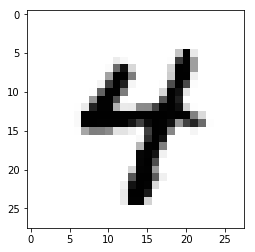

In [28]:
def 辨識(測試編號):
    plt.imshow(x0_test[測試編號], cmap="Greys")
    print("神經網路判斷為:", result[測試編號])

interact_manual(辨識, 測試編號 = (0, 9999));